In [1]:
from ProcessImage import Load_Image, Resize_Image, Detect_box, Process_Image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(imageList, i, num_rows=2, num_cols=2, axis_off=True, figsize=(10, 5)):
    x = 1
    plt.figure(figsize=figsize)
    while (x <= num_rows*num_cols):
        plt.subplot(num_rows, num_cols, x)
        plt.imshow(imageList[i])
        if axis_off:
            plt.axis("off")
        x+=1
        i+=1

In [3]:
# path = "/home/ramiz/signatureDetection/Signs/Processed-Original/English/12/"
# # imagelist = Load_Image(path)
# # print(len(imagelist))
# # show_image(imagelist, 0, num_rows=3, num_cols=2, axis_off=False)

In [4]:
# files = []
# dnames = []
# dpaths = []
# for r, d, f in os.walk(path):
#     for dpath in r:
#         dpaths.append(dpath)
#     for dname in d:
#         dnames.append(dname)
#     for file in f:
#         if ".jpg" in file:
#             files.append(file)
#             print(file)
            
# print(len(files))
# print(len(dnames))

In [5]:
# print(dnames[73])
# print(dpaths[9])

In [32]:
def box_detector(img, draw=False):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_y = np.zeros(img_yuv.shape[0:2], np.uint8)
    img_y[:, :] = img_yuv[:, : , 0]
    
    
    img_blur = cv2.GaussianBlur(img_y, (5,5), 0)
    edges = cv2.Canny(img_blur, 100, 500, apertureSize=3)
    
    contours, hier = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    img_area = img.shape[1] * img.shape[0]
    
    new_contours = []
    for c in contours:
        if cv2.contourArea(c) < img_area:
            new_contours.append(c)
            
    best_box = [-1, -1, -1, -1]
    for c in new_contours:
        x, y, w, h = cv2.boundingRect(c)
        if best_box[0] < 0:
            best_box = [x, y, x+w, y+h]
        else:
            if x < best_box[0]:
                best_box[0] = x
            if y < best_box[1]:
                best_box[1] = y
            if x+w > best_box[2]:
                best_box[2] = x+w
            if y+h > best_box[3]:
                best_box[3] = y+h


    point_a = (best_box[0], best_box[1])
    point_b = (best_box[2], best_box[3])
    
    if draw:
        im = cv2.rectangle(img, point_a, point_a, (0,255,0), 5)
        
    return im, best_box

In [33]:
img = cv2.imread("/home/ramiz/Pictures/wallpaper/kakashi3D.png")

In [34]:
image, box_list = box_detector(img, draw=True)

In [35]:
box_list

[1777, 0, 3268, 2050]

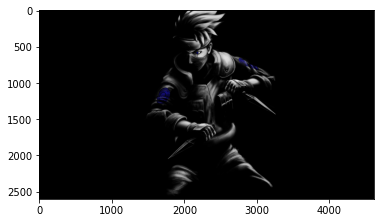

In [37]:
plt.imshow(image)
plt.show()